In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy
from math import *


In [7]:
inputs = [[0.6099999997792109, -1.499999999651984], [0.6100000008750021, -1.4999999986058516], [0.6100000002664135, -1.499999999757268], [0.6100000006962187, -1.4999999994758006], [0.6100000004904917, -1.499999999587536], [0.6100000001929257, -1.4999999994252584], [0.6100000000336562, -1.4999999998110398], [0.6099999994777704, -1.4999999996565354], [0.609999989669044, -1.499999998422993], [0.5489660565374365, -1.4999999995617754], [0.33213971881053034, -1.499999998979548], [0.20719405121730747, -1.4999999997553954], [0.1310819421427793, -1.4999999994057454], [0.029919012652643982, -1.4999999979600946], [-0.015144640254544725, -1.499999997887743], [-0.06961979421888483, -1.499999998778028], [-0.11361821578155142, -1.4999999979044618], [-0.1389240097401729, -1.4999999927647658], [-0.16944498291584825, -1.4668292609235452], [-0.18676589638455154, -1.1042097098334285], [-0.20000716849342481, -0.7425597670091726], [-0.21025757234273182, -0.4672345087935505], [-0.21249757724596424, -0.2797553125481536], [-0.21178661927754874, -0.15968049264227083], [-0.21240187792813572, -0.0856885991468173], [-0.2182436127155608, -0.04132282366947027], [-0.2280432822046175, -0.015308142399522356], [-0.24137196423157317, -0.00039424305388077415], [-0.25847663199681065, 0.007901365637758164], [-0.27889115399937425, 0.012277922287400338], [-0.3027024082330991, 0.014332523130855665], [-0.3299316124330208, 0.014993219766607477], [-0.36065159762396054, 0.014801827766976371], [-0.395047340087804, 0.014079786641810643], [-0.433354608797058, 0.012993217171960966], [-0.4758828239409657, 0.011646860571117768], [-0.5229943315980257, 0.010111812384954654], [-0.5751929071273705, 0.008424527214741255], [-0.6099999970447323, 0.006604494993770131], [-0.6099999997298904, 0.004528967997190167], [-0.6099999995209243, 0.00208351405846698], [-0.6099999999688243, -0.0005777875615708128], [-0.6100000000447107, -0.0033127581346079726], [-0.6100000001313689, -0.005722006435867495], [-0.6100000001780145, -0.005488747279028425], [-0.6100000001943233, -0.0010792257705558052], [-0.6100000003538064, 0.009443413970685722], [-0.6100000002401444, 0.02593240889933929], [-0.6100000002293952, 0.04398586704230481], [-0.6100000001353971, 0.07245830859459934], [-0.6100000014019263, 0.09919488578901312], [-0.6100000003441697, 0.12227172156674236], [-0.6100000049536709, 0.14224972519000512], [-0.6100000045947334, 0.15949599585738455], [-0.6100000073097247, 0.17391272967820426], [-0.6100000024445946, 0.18580572079304716], [-0.6100000037187013, 0.19564057554613282], [-0.6100000055747816, 0.20374949551248225], [-0.6100000030305262, 0.21041269968644905], [-0.6100000011608422, 0.21551433343564874], [-0.6100000522312241, 0.21955432102959116], [-0.6100000576115211, 0.22199587855289724], [-0.6100000118818499, 0.2223537779907172], [-0.6100000854267895, 0.22156515663935747], [-0.6100001730600958, 0.21953326933693906], [-0.6100000491621443, 0.21564745587994458], [-0.6100001647492624, 0.21004830650736517], [-0.6100000922041703, 0.20374906775085005], [-0.6100000517099108, 0.19683149381433793], [-0.6100000361119801, 0.19116949588031437], [-0.6100000099927101, 0.18753656715572525], [-0.6100001059533633, 0.18577324743747547], [-0.6100000038769534, 0.185432578567055], [-0.6100000164351038, 0.1861658364088678], [-0.6100000657279931, 0.18800549335740419], [-0.6100000472557622, 0.19047583606248678], [-0.6100000654966212, 0.19350108784872533], [-0.6100000194171941, 0.19790871253162098], [-0.6100000231609353, 0.20292770920972028]]

In [12]:
inp = np.array(inputs).T

In [16]:
inp[1].shape[0]

79

In [17]:
inp[1]

array([-1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
       -1.50000000e+00, -1.49999999e+00, -1.46682926e+00, -1.10420971e+00,
       -7.42559767e-01, -4.67234509e-01, -2.79755313e-01, -1.59680493e-01,
       -8.56885991e-02, -4.13228237e-02, -1.53081424e-02, -3.94243054e-04,
        7.90136564e-03,  1.22779223e-02,  1.43325231e-02,  1.49932198e-02,
        1.48018278e-02,  1.40797866e-02,  1.29932172e-02,  1.16468606e-02,
        1.01118124e-02,  8.42452721e-03,  6.60449499e-03,  4.52896800e-03,
        2.08351406e-03, -5.77787562e-04, -3.31275813e-03, -5.72200644e-03,
       -5.48874728e-03, -1.07922577e-03,  9.44341397e-03,  2.59324089e-02,
        4.39858670e-02,  7.24583086e-02,  9.91948858e-02,  1.22271722e-01,
        1.42249725e-01,  

In [3]:
x=[0]
y=[0]
yaw=[0]
v=[0]
steering_angle=0
acceleration=0
v_max=80
v_min =-1
max_steering_angle = 0.9
a_max = 1
a_min = -1.5
a_rate_max=1.5
a_rate_min=-3
steer_rate=0.5
lr=1.738
lf=1.105
Q = np.array([[  3.5,  0,  0,  0],
                  [  0,  3.5,  0,  0],
                  [  0,  0,  2.5,  0],
                  [  0,  0,    0,  3.5]])
R = np.eye(2)
R_= np.eye(2)
Hp = 6
Hc = 6
ts=0.1
td=0.2
dt=0.1
L =lr + lf

In [4]:
v_max = v_max
v_min = v_min
delta_f_max = max_steering_angle
a_max = a_max
a_min = a_min
steer_rate = steer_rate
a_rate_max = a_rate_max
a_rate_min = a_rate_min

In [4]:
speed = 13.2285009239462026
x = -16.842267990112305
y = -223.22581481933594
yaw = 1.5481880865109414
wp = [[-16.842267990112305, -223.22581481933594, 1.2295178873288235, 10.0], [-14.934813757798112, -217.56050297954596, 1.2788849523922121, 8.0], [-13.570800910472931, -211.65647296667348, 1.4232967392734457, 5.0], [-13.389941634925464, -205.589677844538, 1.6850661456339946, 4.0], [-15.14255852407123, -199.9906652815648, 2.051803250627153, 2.0], [-18.50294038007302, -194.93976996692965, 2.2261284040873046, 0.0]]

prev_deltas = [-0.24681479, -0.40674397, -0.24680603, -0.12345067,  0.        ]
# prev_accelerations = [1.99999931, 1.94880953, 1.4488118,  0.94881729, 0.        ]

In [28]:
prev_deltas = [-0.24681479, -0.40674397, -0.24680603, -0.12345067,  0., 0.        ]
prev_accelerations = [1.99999931, 1.94880953, 1.4488118,  0.94881729, 0. , 0.       ]

In [12]:
prev_accelerations = np.array([0.0] * Hp)
prev_deltas = np.array([0.0] * Hp)

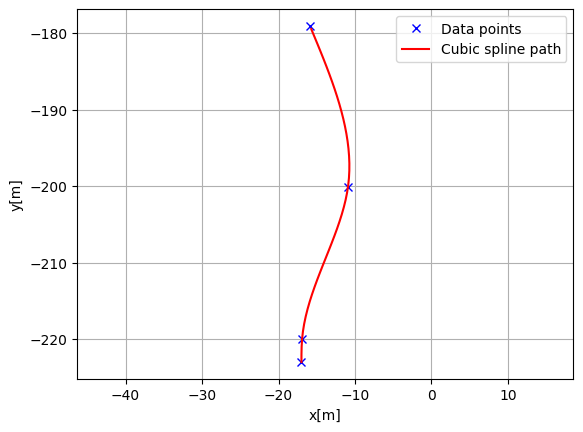

In [9]:
import numpy as np
x = np.array([-17, -16.92, -10.905, -15.889])
y =np.array([-223, -220.06, -200.059, -179.059])
from Utils.CubicSpline.cubic_spline_planner import *
import matplotlib.pyplot as plt
ds = 1  # [m] distance of each interpolated points
sp = CubicSpline2D(x, y)
s = np.arange(0, sp.s[-1], ds)
rx, ry, ryaw, rk = [], [], [], []
for i_s in s:
    ix, iy = sp.calc_position(i_s)
    rx.append(ix)
    ry.append(iy)
    ryaw.append(sp.calc_yaw(i_s))
    rk.append(sp.calc_curvature(i_s))
plt.subplots(1)
plt.plot(x, y, "xb", label="Data points")
plt.plot(rx, ry, "-r", label="Cubic spline path")
plt.grid(True)
plt.axis("equal")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend()
plt.show()

In [10]:
nw_wp = []
for i in range(len(rx)):
    nw_wp.append([rx[i], ry[i], 10, ryaw[i]])

In [27]:
z_ref = np.array(nw_wp).T

In [61]:
def get_ref_traj(type):
        """ 3 types of trajectories available
        A == A right turn with slow speed
        B == A sinusoidal path with morderate speed
        C == CPG winding track"""
        if type == "A":
            T = 81     #total simulation time
            N_steps = int(T/ts)
            v = np.array([0.0]*N_steps)
            # constructing the reference velocity profile
            #for 5s speed is 0
            n = int(5/ts)
            v[:n] = 0
            #for next 45s speed is 3m/s
            n1 = int(45/ts + n)
            v[n:n1] = 3
            #for next 4s speed gradualy reduces to zero
            n = int(4/ts)
            for i in range(n):
                v[n1+i] = v[n1+i-1]-0.75*ts
            # for next 4 sec speed is 0
            n1 = int(n1 + n)
            n  = int(3/ts +n1)
            v[n1:n] = 0.0
            # for next 12s speed is 6m/s
            n1 = int(12/ts + n)
            v[n:n1] = 6
            #for next 10 s the speed delecerates to 0
            n = int(10/ts)
            for i in range(n):
                v[n1+i] = v[n1+i-1]-0.6*ts
            #for next 1s speed is zero
            n1 = int(n1 + n)
            n  = int(1/ts)
            v[n1:n] = 0.0
            # #hence total simulation time is 5+45+4+4+12+10+1 = 81s

            # now based on the refrence velocity we get the x,v,yaw of the vehicle
            x   = np.array([0.0]*N_steps)
            y   = np.array([0.0]*N_steps)
            yaw = np.array([0.0]*N_steps)

            #first 30 secs straight road in x direction
            for i in range(int(30/ts)-1):
                yaw[i+1] = yaw[i]
                x[i+1] = x[i] + v[i]*cos(yaw[i])*ts
                y[i+1] = y[i] + v[i]*sin(yaw[i])*ts 
            # turining right in 10s 
            for i in range(int(30/ts)-1,int(40/ts)-1):
                yaw[i+1] = yaw[i] + pi/20*ts
                x[i+1] = x[i] + v[i]*cos(yaw[i])*ts
                y[i+1] = y[i] + v[i]*sin(yaw[i])*ts
            #again straight for next 31 secs in y direction
            for i in range(int(40/ts)-1,int(81/ts)-1):
                yaw[i+1] = yaw[i]
                x[i+1] = x[i] + v[i]*cos(yaw[i])*ts
                y[i+1] = y[i] + v[i]*sin(yaw[i])*ts
        return np.array([x,y,yaw,v])

In [62]:
z_ref = get_ref_traj("A")

In [158]:
speed = 13.2285009239462026
x = -16.842267990112305
y = -223.22581481933594
yaw = 1.5481880865109414
x0 = np.array([[x], [y], [speed], [yaw]])

In [64]:
x0 = np.array([[0], [0], [0], [0]])

In [103]:
import math

In [104]:
def Kinematic_model(yaw,steering_angle=0,dt=0.1):
    """Prediction module for vehicle states"""
    beta = math.atan(lr*np.tan(steering_angle)/L)
    # beta = steering_angle
    A = np.array([[1,0,np.cos(yaw+beta)*dt,0],
                      [0,1,np.sin(yaw+beta)*dt,0],
                      [0,0,1,0],
                      [0,0,0,1]])
        
    B = np.array([[0,0],
                     [0,0],
                     [dt,0],
                     [0,np.sin(beta)*dt/(lr)]])
    
    return A, B
        

In [101]:
prev_deltas[np.min([2,len(prev_deltas)-1])]

0.0

In [159]:
prev_deltas

[-0.24681479, -0.40674397, -0.24680603, -0.12345067, 0.0, 0.0]

In [81]:
z_ref[2][2]

1.533148475099434

In [68]:
z_ref.shape[1]

810

In [22]:
   Qf = np.array([[  3.5,  0,  0,  0],
                  [  0,  3.5,  0,  0],
                  [  0,  0,  1.5,  0],
                  [  0,  0,  0,  3.5]])

In [ ]:
def MPC2(z_ref, z_initial, Hp=6, ts=0.1, L=2.843, a_min=-1.5, a_max=1.0, 
    delta_f_max=0.9, a_rate_max=1.5, steer_rate=0.175):
          
        z = cvxpy.Variable((4, Hp + 1))
        u = cvxpy.Variable((2, Hp))

        cost = 0
        constraints = [z[:, 0] == z_initial.flatten()]
        for i in range(Hp - 1):
            ## Cost
            if i != 0:
                cost += cvxpy.quad_form(z_ref[:, i] - z[:, i], Q)
                cost += cvxpy.quad_form(u[:, i] - u[:, i-1], R)
            else:
                u_prev = [prev_accelerations[0], prev_deltas[0]]
                cost += cvxpy.quad_form(u[:, i] - u_prev, R)

            cost += cvxpy.quad_form(u[:, i], R)

            ## Constraints
            A, B = Kinematic_model(z_ref[3, i], prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])], dt)

            constraints += [z[:, i+1] == A @ z[:, i] + B @ u[:, i] ]

            # Velocity limits
            constraints += [z[2, i] <= v_max]
            constraints += [z[2, i] >= v_min]

            # Input limits
            constraints += [a_min <= u[0, i]]
            constraints += [u[0, i] <= a_max]
            constraints += [u[1, i] <= max_steering_angle]
            constraints += [u[1, i] >= -max_steering_angle]
            # Rate of change of input limit
            if i != 0:
                constraints += [u[0, i] - u[0, i-1] <= a_rate_max]
                constraints += [u[0, i] - u[0, i-1] >= -a_rate_max]
                constraints += [u[1, i] - u[1, i-1] <= steer_rate * dt]
                constraints += [u[1, i] - u[1, i-1] >= -steer_rate * dt]
                # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) <= dist]
                # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) >= -dist]
                # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) <= dist]
                # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) >= -dist]

        # Terminal cost
        cost += cvxpy.quad_form(z_ref[:, -1] - \
                                z[:, -1], Qf)

        # Quadratic Program
        qp = cvxpy.Problem(cvxpy.Minimize(cost), constraints)
        qp.solve(solver=cvxpy.ECOS, verbose=False)

        # print(qp.status)
        qp_status = str(qp.status)
        if qp_status == "infeasible":
            print(qp_status)

        if qp.status == cvxpy.OPTIMAL or qp.status == cvxpy.OPTIMAL_INACCURATE:
            x = np.array(z.value[0, :]).flatten()
            y = np.array(z.value[1, :]).flatten()
            v = np.array(z.value[2, :]).flatten()
            yaw = np.array(z.value[3, :]).flatten()
            a = np.array(u.value[0, :]).flatten()
            delta = np.array(u.value[1, :]).flatten()
        else:
            # x, y, v, yaw, a, delta = None, None, None, None, None, None
            a, delta = None, None

        return a, delta, qp_status

In [153]:
def MPC1(z_ref, z_initial, Hp=6, ts=0.1, L=2.843, a_min=-1.5, a_max=1.0, 
    delta_f_max=0.9, a_rate_max=1.5, steer_rate=0.175):
          
        z = cvxpy.Variable((4, Hp + 1))
        u = cvxpy.Variable((2, Hp))

        cost = 0
        constraints = [z[:, 0] == z_initial.flatten()]
        for i in range(Hp - 1):
            ## Cost
            if i != 0:
                cost += cvxpy.quad_form(z_ref[:, i] - z[:, i], Q)
                cost += cvxpy.quad_form(u[:, i] - u[:, i-1], R)
            else:
                u_prev = [prev_accelerations[0], prev_deltas[0]]
                cost += cvxpy.quad_form(u[:, i] - u_prev, R)

            cost += cvxpy.quad_form(u[:, i], R)
            print(prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])])
            print(z_ref[3, i])
            ## Constraints
            A, B = Kinematic_model(z_ref[3, i], prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])], dt)

            constraints += [z[:, i+1] == A @ z[:, i] + B @ u[:, i] ]

            # Velocity limits
            constraints += [z[2, i] <= v_max]
            constraints += [z[2, i] >= v_min]

            # Input limits
            constraints += [a_min <= u[0, i]]
            constraints += [u[0, i] <= a_max]
            constraints += [u[1, i] <= max_steering_angle]
            constraints += [u[1, i] >= -max_steering_angle]
            # Rate of change of input limit
            if i != 0:
                constraints += [u[0, i] - u[0, i-1] <= a_rate_max]
                constraints += [u[0, i] - u[0, i-1] >= -a_rate_max]
                constraints += [u[1, i] - u[1, i-1] <= steer_rate * dt]
                constraints += [u[1, i] - u[1, i-1] >= -steer_rate * dt]
                # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) <= dist]
                # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) >= -dist]
                # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) <= dist]
                # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) >= -dist]

        # Terminal cost
        cost += cvxpy.quad_form(z_ref[:, -1] - \
                                z[:, -1], Qf)

        # Quadratic Program
        qp = cvxpy.Problem(cvxpy.Minimize(cost), constraints)
        qp.solve(solver=cvxpy.ECOS, verbose=False)

        # print(qp.status)
        qp_status = str(qp.status)
        if qp_status == "infeasible":
            print(qp_status)

        if qp.status == cvxpy.OPTIMAL or qp.status == cvxpy.OPTIMAL_INACCURATE:
            x = np.array(z.value[0, :]).flatten()
            y = np.array(z.value[1, :]).flatten()
            v = np.array(z.value[2, :]).flatten()
            yaw = np.array(z.value[3, :]).flatten()
            a = np.array(u.value[0, :]).flatten()
            delta = np.array(u.value[1, :]).flatten()
        else:
            # x, y, v, yaw, a, delta = None, None, None, None, None, None
            a, delta = None, None
        print(a)
        print(delta)
        return a, delta, qp_status

In [92]:
def MPC(z_ref, z_initial, Hp=6, ts=0.1, L=2.843, a_min=-1.5, a_max=1.0, 
    delta_f_max=0.9, a_rate_max=1.5, steer_rate=0.175):
        
    """MPC solver """
    z = cvxpy.Variable((4,Hp),"z")
    u = cvxpy.Variable((2,Hp),"u")
    
    cost = 0
    constraints = [z[:,0] == z_initial.flatten()]
    # constraints = []
    # Hp = min(Hp,z_ref.shape[1])
    if z_ref.shape[1] < Hp:
        return None, None
    for i in range(Hp-1):
        print(i)
        if i != 0:
            cost += cvxpy.quad_form(z_ref[:,i] - z[:,i], Q)
            cost += cvxpy.quad_form(u[:,i]-u[:,i-1], R)
        else:
            u_prev = [prev_deltas[0],prev_accelerations[0]]
            cost += cvxpy.quad_form(u[:, i] - u_prev, R)
        
        cost += cvxpy.quad_form(u[:,i],R_)
        
        #constrains
        print(z_ref[2][i])
        print(prev_deltas[np.min([i+1,len(prev_deltas)-1])])

        A,B = Kinematic_model(z_ref[2][i],prev_deltas[np.min([i+1,len(prev_deltas)-1])],td)
        constraints += [z[:,i+1] == A @ z[:,i] + B @ u[:,i]]

        #velocity limits
        # constraints += [z[3, i] <= v_max]
        # constraints += [z[3, i] >= v_min]

        #input limits
        constraints += [a_min <= u[1, i]]
        constraints += [u[1, i] <= a_max]
        constraints += [u[0, i] <= delta_f_max]
        constraints += [u[0, i] >= -delta_f_max]

        #rate constraints
        if i != 0:
            constraints += [(u[1, i] - u[1, i-1])/td <= a_rate_max]
            constraints += [(u[1, i] - u[1, i-1])/td >= -a_rate_max]
            constraints += [(u[0, i] - u[0, i-1])/td <= steer_rate]
            constraints += [(u[0, i] - u[0, i-1])/td >= -steer_rate]
        # else:
        #     constraints += [(u[1, i] - prev_accelerations[0])/ts  <= a_rate_max]
        #     constraints += [(u[1, i] - prev_accelerations[0]/ts ) >= -a_rate_max]
        #     constraints += [(u[0, i] - prev_deltas[0])/ts <= steer_rate]
        #     constraints += [(u[0, i] - prev_deltas[0])/ts >= -steer_rate]
    #Quad program

    qp = cvxpy.Problem(cvxpy.Minimize(cost), constraints)
    qp.solve(solver=cvxpy.ECOS_BB, verbose=False)
    print(qp.status)
    if qp.status == cvxpy.OPTIMAL or qp.status == cvxpy.OPTIMAL_INACCURATE:
        x = np.array(z.value[0, :]).flatten()
        y = np.array(z.value[1, :]).flatten()
        v = np.array(z.value[3, :]).flatten()
        yaw = np.array(z.value[2, :]).flatten()
        a = np.array(u.value[1, :]).flatten()
        delta = np.array(u.value[0, :]).flatten()
    else:
        a, delta = None, None
    
    print(f'acc = {a}')
    print(f'delta = {delta}')
    return a, delta

In [147]:
prev_deltas

[-0.24681479, -0.40674397, -0.24680603, -0.12345067, 0.0, 0.0]

In [146]:
prev_accelerations

[1.99999931, 1.94880953, 1.4488118, 0.94881729, 0.0, 0.0]

In [154]:
def solve(z_intital, z_ref):
        # """function to call mpc solver"""
        # z_intital = np.array([x,y,yaw,v])
        a,delta, st = MPC1(z_ref,z_intital)
        if a is None:
            prev_accelerations = prev_accelerations[1:]
            prev_deltas = prev_deltas[1:]
        else:
            prev_accelerations = a
            prev_deltas = delta
        # print(prev_deltas)
        return prev_accelerations[0], prev_deltas[0]

In [160]:
a, delta = solve(x0, z_ref)

In [161]:
x0

array([[ -16.84226799],
       [-223.22581482],
       [  13.22850092],
       [   1.54818809]])

In [162]:
A,B = Kinematic_model(x0[3][0],delta,ts)

In [163]:
z = A @ x0 + B @ np.array([[a],[delta]])

In [164]:
a

-1.4999999992877289

In [165]:
delta

0.09194956492993768

In [166]:
v = x0[2] + a*dt
x = x0[0] + x0[2]*np.cos(x0[3])*dt
y = x0[1] + x0[2]*np.sin(x0[3])*dt
yaw = x0[3] + x0[2]/L*np.tan(delta)*dt

In [167]:
z

array([[ -16.81236323],
       [-221.90330279],
       [  13.07850092],
       [   1.54848631]])

In [168]:
x0 =  np.array([z[0],z[1],z[2],z[3]])

In [169]:
x0

array([[ -16.81236323],
       [-221.90330279],
       [  13.07850092],
       [   1.54848631]])

In [170]:
z_ref = np.delete(z_ref,0,axis=1)

In [171]:
a,delta = solve(x0, z_ref)

In [160]:
prev_deltas

[-0.24681479, -0.40674397, -0.24680603, -0.12345067, 0.0, 0.0]

In [155]:
z_ref = np.array(nw_wp).T

In [156]:
prev_deltas = [-0.24681479, -0.40674397, -0.24680603, -0.12345067,  0., 0.        ]
prev_accelerations = [1.99999931, 1.94880953, 1.4488118,  0.94881729, 0. , 0.       ]

In [157]:
speed = 13.2285009239462026
x = -16.842267990112305
y = -223.22581481933594
yaw = 1.5481880865109414
x0 = np.array([[x], [y], [speed], [yaw]])

In [158]:
prev_deltas

[-0.24681479, -0.40674397, -0.24680603, -0.12345067, 0.0, 0.0]

In [159]:

a, delta = solve(x0, z_ref)
states = [x0]
inputs = list(np.array([[0],[0]]))
for i in range(0,z_ref.shape[1]-Hp):
    z_ref1 = np.delete(z_ref,0,axis=1)
    A,B = Kinematic_model(x0[3][0],delta,ts)
    z = A @ x0 + B @ np.array([[a],[delta]])
    x0=z
    states.append(x0)
    a,delta = solve(x0, z_ref1)
    inputs.append(np.array([[delta],[a]]))
    



-0.40674397
1.5704623439939223
-0.24680603
1.5611604173336642
-0.12345067
1.533148475099434
0.0
1.4862454476513682
0.0
1.4336749457866036
[-0.85916596 -1.44894445 -1.22389308 -0.76939233 -0.38469595  0.        ]
[-0.06543352 -0.04793354 -0.0304336  -0.01293636 -0.00646814  0.        ]
-0.40674397
1.5611604173336642
-0.24680603
1.533148475099434
-0.12345067
1.4862454476513682
0.0
1.4336749457866036
0.0
1.3862321793374863
[-0.84758374 -1.42896574 -1.20218054 -0.75281495 -0.37640717  0.        ]
[-0.06241406 -0.04491419 -0.0274146  -0.01097734 -0.00548904  0.        ]
-0.40674397
1.5611604173336642
-0.24680603
1.533148475099434
-0.12345067
1.4862454476513682
0.0
1.4336749457866036
0.0
1.3862321793374863
[-0.92112608 -1.47812719 -1.21558842 -0.74838742 -0.37419616  0.        ]
[-0.06239479 -0.04489519 -0.02739639 -0.01100006 -0.0055066   0.        ]
-0.40674397
1.5611604173336642
-0.24680603
1.533148475099434
-0.12345067
1.4862454476513682
0.0
1.4336749457866036
0.0
1.3862321793374863
[-0.

In [106]:
states

[array([[ -16.84226799],
        [-223.22581482],
        [  13.22850092],
        [   1.54818809]]),
 array([[ -16.8312117 ],
        [-221.90301093],
        [  13.07850092],
        [   1.5482072 ]]),
 array([[ -16.87160805],
        [-220.59578486],
        [  12.92850092],
        [   1.54847585]]),
 array([[ -16.91215351],
        [-219.3035707 ],
        [  12.77850092],
        [   1.54874656]]),
 array([[ -16.95294444],
        [-218.02637183],
        [  12.62850092],
        [   1.5490202 ]]),
 array([[ -16.99407372],
        [-216.76419168],
        [  12.47850093],
        [   1.54929763]]),
 array([[ -17.03533515],
        [-215.51702395],
        [  12.32850093],
        [   1.54957731]]),
 array([[ -17.07680928],
        [-214.28487167],
        [  12.17850093],
        [   1.54986002]]),
 array([[ -17.11850091],
        [-213.06773541],
        [  12.02850093],
        [   1.55014593]]),
 array([[ -17.1604136 ],
        [-211.86561576],
        [  11.87850093],
       

In [38]:
z_ref

array([[ -13.72528002,  -14.10843846,  -14.50184093,  -14.90316469,
         -15.31008698,  -15.72028507],
       [-184.37181477, -183.39072808, -182.40909543, -181.42704061,
        -180.44468742, -179.46215964],
       [  10.        ,   10.        ,   10.        ,   10.        ,
          10.        ,   10.        ],
       [   1.93800746,    1.94788577,    1.95568887,    1.9614597 ,
           1.96523052,    1.96702262]])

In [129]:
states1 = np.array(states).T

In [ ]:
step=1

In [120]:
z_ref[0]

array([-17.        , -16.9965592 , -16.97448309, -16.91513718,
       -16.80456582, -16.64450686, -16.43998478, -16.19602408,
       -15.91764921, -15.60988468, -15.27775496, -14.92628452,
       -14.56049786, -14.18541946, -13.80607378, -13.42748532,
       -13.05467856, -12.69267798, -12.34650806, -12.02119328,
       -11.72175812, -11.45322706, -11.22062459, -11.02897518,
       -10.88329698, -10.78665699, -10.73742503, -10.73327834,
       -10.77189416, -10.85094976, -10.96812238, -11.12108927,
       -11.30752768, -11.52511488, -11.77152809, -12.04444459,
       -12.34154161, -12.66049642, -12.99898626, -13.35468837,
       -13.72528002, -14.10843846, -14.50184093, -14.90316469,
       -15.31008698, -15.72028507])

In [130]:
states1[0][0]

array([-16.84226799, -16.75945192, -16.67979896, -16.60085378,
       -16.52268927, -16.44555123, -16.36918506, -16.29375956,
       -16.21921496, -16.14542033, -16.0725828 , -16.00107662,
       -15.93067098, -15.86079225, -15.79222609, -15.72614827,
       -15.65940276, -15.59419062, -15.53078603, -15.46878309,
       -15.40664342, -15.3467584 , -15.28810256, -15.22922772,
       -15.17350508, -15.1166994 , -15.06045985, -15.00536417,
       -14.95186964, -14.90175967, -14.85291198, -14.80482061,
       -14.75728417, -14.71046785, -14.66214382, -14.61477865,
       -14.56959822, -14.52426944, -14.48163277, -14.43914758,
       -14.39689667])

In [111]:
xxxx = states1[0][1]

In [1]:
plt.subplots(1)
plt.plot(list(range(0,xxxx.shape[0],step)), states1[0][2], "xb", label="actual")
plt.plot(list(range(0,xxxx.shape[0],step)), z_ref[2][:xxxx.shape[0]], "--", label="reference")

plt.grid(True)
plt.axis("equal")
plt.xlabel("step")
plt.ylabel("velocity [m/s]")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

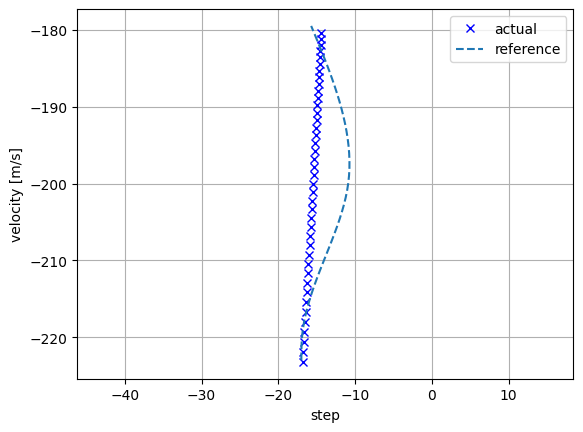

In [132]:
states1 = np.array(states).T
plt.subplots(1)
plt.plot(states1[0][0], states1[0][1], "xb", label="actual")
plt.plot(z_ref[0], z_ref[1], "--", label="reference")

plt.grid(True)
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

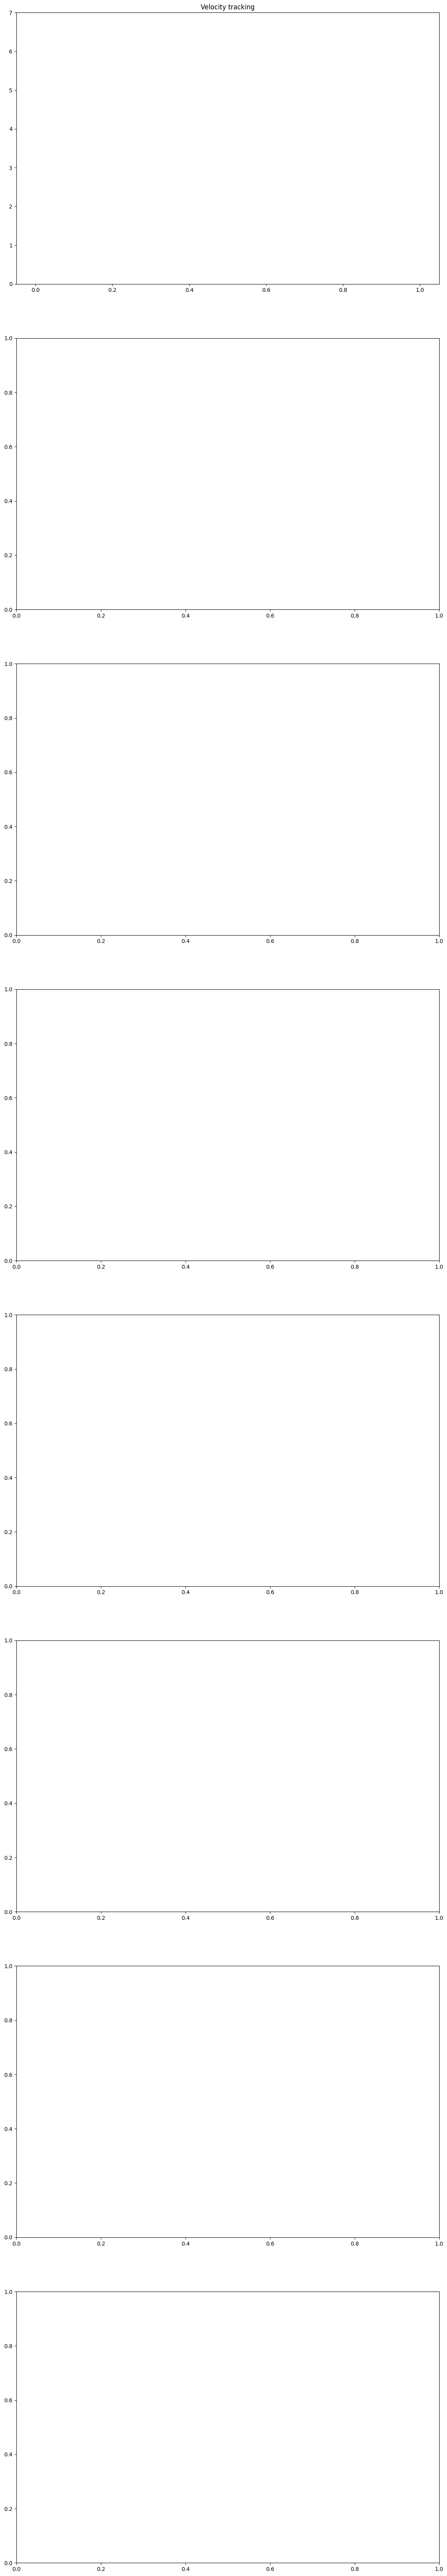

In [61]:
fig , axes = plt.subplots(8,1,figsize=(14,85))
axes[0].plot(list(range(0,2,step)),states1[0][list(range(0,2,step))])
axes[0].set_title("Velocity tracking")
axes[0].set(ylim=(0,7))
axes[0].plot(list(range(0,s,step)),z_ref[2][list(range(0,s,step))],"--")
axes[0].legend(["actual","reference"])


In [108]:
axes[1].plot(list(range(0,s,step)),controller.inputs[1][list(range(0,s,step))])
axes[1].set_title("acceleration")
axes[1].set(ylim=(-2,1.5))
axes[2].plot(list(range(0,s,step)),controller.inputs[0][list(range(0,s,step))])
axes[2].set_title("steering angle delta")
axes[2].set(ylim=(-0.4,0.4))
axes[3].plot(list(range(0,s,step)),controller.states[2][list(range(0,s,step))])
axes[3].set_title("Heading angle")
axes[3].set(ylim=(-pi,pi))
axes[4].plot(list(range(0,s,step)),controller.states[0][list(range(0,s,step))])
axes[4].set_title("x vs t")
axes[5].plot(list(range(0,s,step)),controller.states[1][list(range(0,s,step))])
axes[5].set_title("y vs t")
axes[6].plot(controller.states[0],controller.states[1][list(range(0,s,step))])
axes[6].set_title("x vs y")
axes[6].plot(z_ref[0],z_ref[1],"--")
axes[6].legend(["actual","reference"])


array([[ -17.        ,  -16.9965592 ,  -16.97448309,  -16.91513718,
         -16.80456582,  -16.64450686,  -16.43998478,  -16.19602408,
         -15.91764921,  -15.60988468,  -15.27775496,  -14.92628452,
         -14.56049786,  -14.18541946,  -13.80607378,  -13.42748532,
         -13.05467856,  -12.69267798,  -12.34650806,  -12.02119328,
         -11.72175812,  -11.45322706,  -11.22062459,  -11.02897518,
         -10.88329698,  -10.78665699,  -10.73742503,  -10.73327834,
         -10.77189416,  -10.85094976,  -10.96812238,  -11.12108927,
         -11.30752768,  -11.52511488,  -11.77152809,  -12.04444459,
         -12.34154161,  -12.66049642,  -12.99898626,  -13.35468837,
         -13.72528002,  -14.10843846,  -14.50184093,  -14.90316469,
         -15.31008698,  -15.72028507],
       [-223.        , -221.99757001, -220.9973361 , -220.00149426,
        -219.01171971, -218.0279411 , -217.04972123, -216.07662295,
        -215.10820909, -214.14404247, -213.18368591, -212.22670226,
        -

In [89]:
A,B = Kinematic_model(1.57,0,0.1)

In [90]:
A

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.96326711e-05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 9.99999683e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])